In [1]:
import os
os.chdir("C:/Users/hp/Documents")

import numpy as np 
import pandas as pd

import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)

C:\Users\hp\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


#### Importation of dataset

In [2]:
test1= pd.read_csv("test.csv", na_values=['?', None])
test1.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [3]:
train1= pd.read_csv("train.csv", na_values=['?', None])
train1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
store= pd.read_csv("store.csv", na_values=['?', None])
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
sample_submission= pd.read_csv("sample_submission.csv", na_values=['?', None])
sample_submission.head()

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


#### Let's have  a look on our dataframe  in order to see  how  data are distributed 

In [6]:
test1.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


In [7]:
train1.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [8]:
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [9]:
sample_submission.describe()

,Id,Sales
count,41088.000000,41088.0
mean,20544.500000,0.0
std,11861.228267,0.0
min,1.000000,0.0
25%,10272.750000,0.0
50%,20544.500000,0.0
75%,30816.250000,0.0
max,41088.000000,0.0


### Data Cleanning 

In [10]:

# Checking for null values
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # dtype of missing values
    mis_val_dtype = df.dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [11]:
missing_values_table(train1)

Your selected dataframe has 9 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,Dtype


In [12]:
missing_values_table(test1)

Your selected dataframe has 8 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Open,11,0.0,float64


In [13]:
missing_values_table(store)

Your selected dataframe has 10 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Promo2SinceWeek,544,48.8,float64
Promo2SinceYear,544,48.8,float64
PromoInterval,544,48.8,object
CompetitionOpenSinceMonth,354,31.7,float64
CompetitionOpenSinceYear,354,31.7,float64
CompetitionDistance,3,0.3,float64


In [14]:
missing_values_table(sample_submission)

Your selected dataframe has 2 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,Dtype


#### Let's fill missing value with appropriate method

In [15]:
#fix the missing values
def fix_missing_ffill(df, col):
    df[col] = df[col].fillna(method='ffill')
    return df[col]

def fix_missing_bfill(df, col):
    df[col] = df[col].fillna(method='bfill')
    return df[col]

In [16]:
test1['Open'] = fix_missing_ffill(test1, 'Open')
store['Promo2SinceWeek'] = store['Promo2SinceWeek'].fillna(store['Promo2SinceWeek'].mean())
store['Promo2SinceYear'] = store['Promo2SinceYear'].fillna(store['Promo2SinceYear'].mode()[0])
store['PromoInterval'] = store['PromoInterval'].fillna(store['PromoInterval'].mode()[0])
store['CompetitionOpenSinceMonth'] = store['CompetitionOpenSinceMonth'].fillna(store['CompetitionOpenSinceMonth'].mode()[0])
store['CompetitionOpenSinceYear'] = store['CompetitionOpenSinceYear'].fillna(store['CompetitionOpenSinceYear'].mode()[0])
store['CompetitionDistance'] = store['CompetitionDistance'].fillna(store['CompetitionDistance'].mean())

In [17]:

missing_values_table(store)

Your selected dataframe has 10 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,Dtype


In [18]:
missing_values_table(test1)

Your selected dataframe has 8 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,Dtype


### Merge dataset

In [19]:
#merge the store dataset with the test dataset

test = pd.merge(left=store, right=test1, left_on='Store', right_on='Store')
test

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Id,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0,"Jan,Apr,Jul,Oct",1,4,2015-09-17,1.0,1,0,0
1,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0,"Jan,Apr,Jul,Oct",857,3,2015-09-16,1.0,1,0,0
2,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0,"Jan,Apr,Jul,Oct",1713,2,2015-09-15,1.0,1,0,0
3,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0,"Jan,Apr,Jul,Oct",2569,1,2015-09-14,1.0,1,0,0
4,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0,"Jan,Apr,Jul,Oct",3425,7,2015-09-13,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,1115,d,c,5350.0,9.0,2013.0,1,22.000000,2012.0,"Mar,Jun,Sept,Dec",37664,3,2015-08-05,1.0,1,0,1
41084,1115,d,c,5350.0,9.0,2013.0,1,22.000000,2012.0,"Mar,Jun,Sept,Dec",38520,2,2015-08-04,1.0,1,0,1
41085,1115,d,c,5350.0,9.0,2013.0,1,22.000000,2012.0,"Mar,Jun,Sept,Dec",39376,1,2015-08-03,1.0,1,0,1
41086,1115,d,c,5350.0,9.0,2013.0,1,22.000000,2012.0,"Mar,Jun,Sept,Dec",40232,7,2015-08-02,0.0,0,0,1


In [26]:
#merge the store dataset with the train dataset
train = pd.merge(left=store, right=train1, left_on='Store', right_on='Store')
train

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0,"Jan,Apr,Jul,Oct",5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0,"Jan,Apr,Jul,Oct",4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0,"Jan,Apr,Jul,Oct",3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0,"Jan,Apr,Jul,Oct",2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0,"Jan,Apr,Jul,Oct",1,2015-07-27,6102,612,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,d,c,5350.0,9.0,2013.0,1,22.000000,2012.0,"Mar,Jun,Sept,Dec",6,2013-01-05,4771,339,1,0,0,1
1017205,1115,d,c,5350.0,9.0,2013.0,1,22.000000,2012.0,"Mar,Jun,Sept,Dec",5,2013-01-04,4540,326,1,0,0,1
1017206,1115,d,c,5350.0,9.0,2013.0,1,22.000000,2012.0,"Mar,Jun,Sept,Dec",4,2013-01-03,4297,300,1,0,0,1
1017207,1115,d,c,5350.0,9.0,2013.0,1,22.000000,2012.0,"Mar,Jun,Sept,Dec",3,2013-01-02,3697,305,1,0,0,1


In [27]:
#let's create a Day of Week feature for train and test data
train['Date']=pd.to_datetime(train['Date'])
test['Date']=pd.to_datetime(test['Date'])

### Exploratory Data Analysis

#### let's check for distributions in both training and test sets ( are the promotions distributed similarly between these two groups? )

## scaling

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
data_scal1 = (train['Promo']-train['Promo'].min())/(train['Promo'].max()-train['Promo'].min())
data_scal2 = (test['Promo']-test['Promo'].min())/(test['Promo'].max()-test['Promo'].min())

[Text(0.5, 0, 'Promotion')]

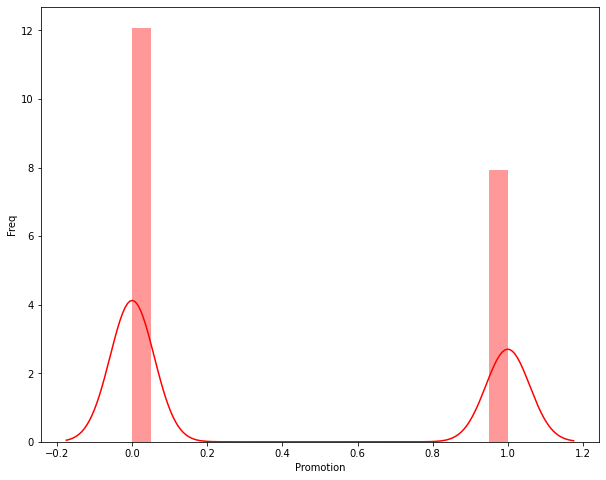

In [30]:
# promotions,
fig,ax=plt.subplots(figsize=(10,8))
sns.distplot(data_scal2,bins=20,color='red')
ax.set(ylabel='Freq')
ax.set(xlabel='Promotion')

[Text(0.5, 0, 'Promotions')]

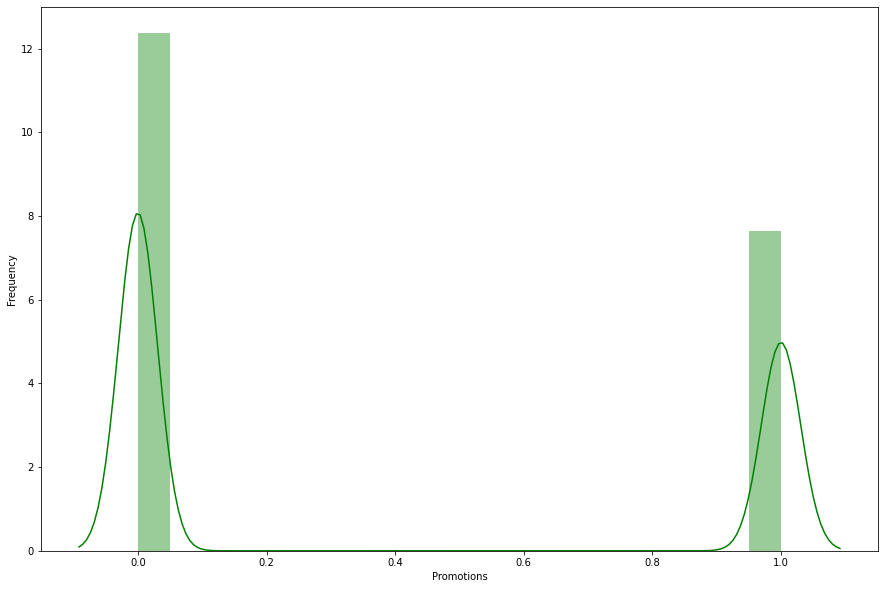

In [31]:
fig,ax=plt.subplots(figsize=(15,10))
sns.distplot(data_scal1,bins=20,color='green')
ax.set(ylabel='Frequency')
ax.set(xlabel='Promotions')

The distribution of promotion within  train dataframe and test data frame are looked very similar.

In [32]:
#Let's compute the  avaregae sales per customer 
train['Sales_per_Customer']=train['Sales']/train['Customers']
train

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales_per_Customer
0,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0,"Jan,Apr,Jul,Oct",5,2015-07-31,5263,555,1,1,0,1,9.482883
1,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0,"Jan,Apr,Jul,Oct",4,2015-07-30,5020,546,1,1,0,1,9.194139
2,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0,"Jan,Apr,Jul,Oct",3,2015-07-29,4782,523,1,1,0,1,9.143403
3,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0,"Jan,Apr,Jul,Oct",2,2015-07-28,5011,560,1,1,0,1,8.948214
4,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0,"Jan,Apr,Jul,Oct",1,2015-07-27,6102,612,1,1,0,1,9.970588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,d,c,5350.0,9.0,2013.0,1,22.000000,2012.0,"Mar,Jun,Sept,Dec",6,2013-01-05,4771,339,1,0,0,1,14.073746
1017205,1115,d,c,5350.0,9.0,2013.0,1,22.000000,2012.0,"Mar,Jun,Sept,Dec",5,2013-01-04,4540,326,1,0,0,1,13.926380
1017206,1115,d,c,5350.0,9.0,2013.0,1,22.000000,2012.0,"Mar,Jun,Sept,Dec",4,2013-01-03,4297,300,1,0,0,1,14.323333
1017207,1115,d,c,5350.0,9.0,2013.0,1,22.000000,2012.0,"Mar,Jun,Sept,Dec",3,2013-01-02,3697,305,1,0,0,1,12.121311


### let's check and compare sales behavior before,during and after holidays

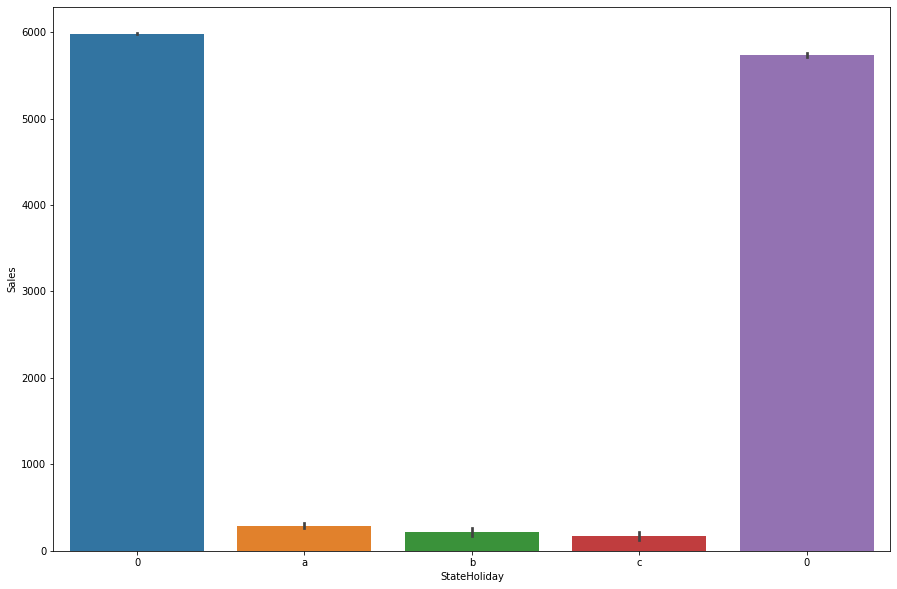

In [33]:
fig,ax=plt.subplots(figsize=(15,10))
sns.barplot(x='StateHoliday',y='Sales',data=train) 
plt.show()

by having a look on the graph , we can notice that , there two type of  in the graph, the best way will be to combine both in 0 because they meanme things

In [34]:
train['StateHoliday'].loc[train['StateHoliday']==0]='0'
train['StateHoliday'].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

Now we can notice that there is  an unique value of 0 among the level on the column StateHoliday

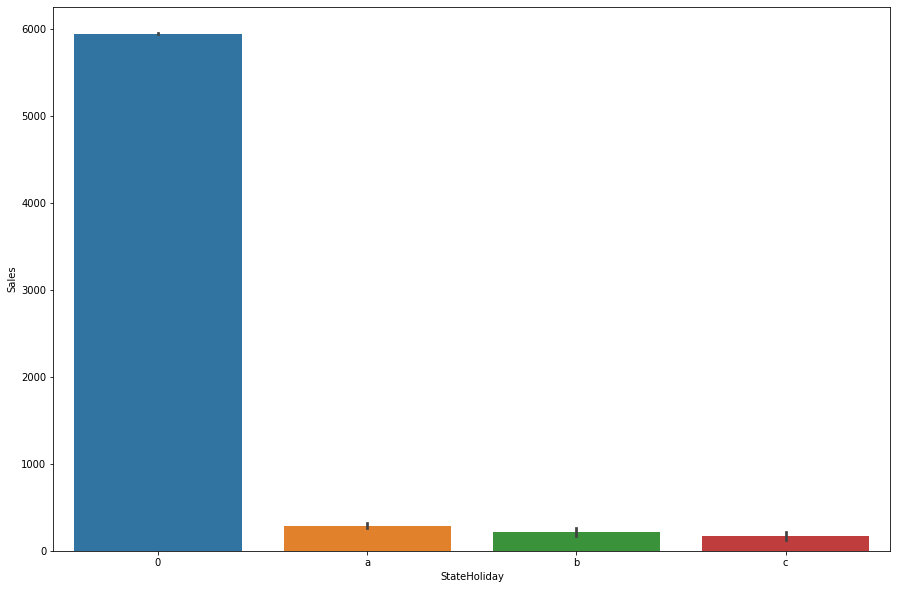

In [35]:
fig,ax=plt.subplots(figsize=(15,10))
sns.barplot(x='StateHoliday',y='Sales',data=train) 
plt.show()

Better,  and we can notice that ,  people sell most of the time because  a , b  and c a re very far from 0 which means no Holiday  

Text(0.5, 1.0, 'Store 200 sales distribution')

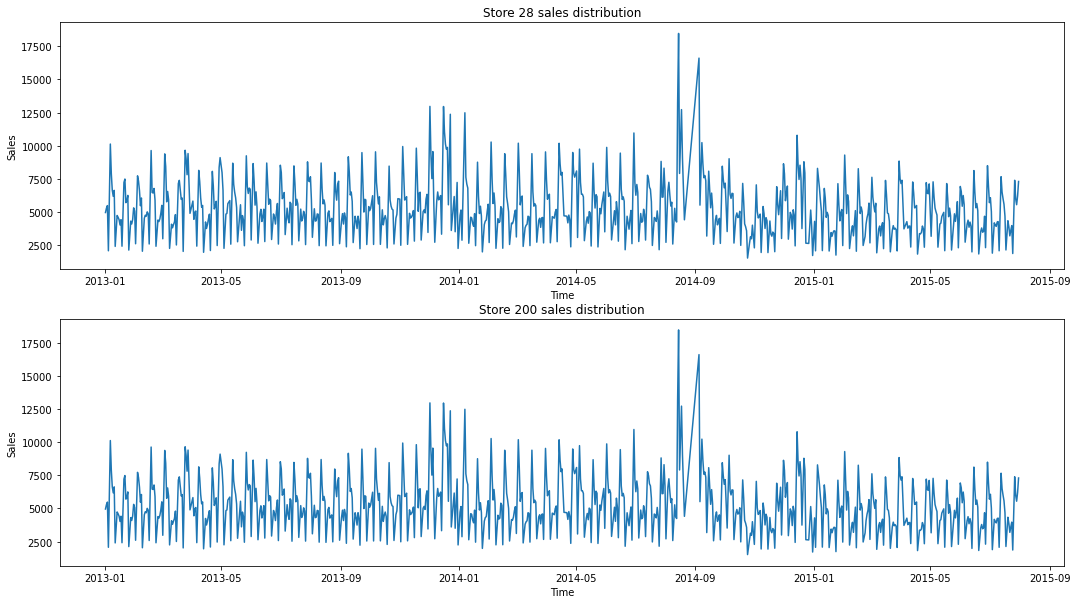

In [30]:
####Seasonnality 
store_28=train.loc[(train['Store']==28)& (train['Sales']>0),['Date','Sales']]
store_2000=train.loc[(train['Store']==200)& (train['Sales']>0),['Date','Sales']]
fig=plt.figure(figsize=(18,10))
ax1=fig.add_subplot(211)
ax1.plot(store_28['Date'],store_28['Sales'],'-')
ax1.set_xlabel('Time')
ax1.set_ylabel('Sales')
ax1.set_title('Store 28 sales distribution')

ax2=fig.add_subplot(212)
ax2.plot(store_28['Date'],store_28['Sales'],'-')
ax2.set_xlabel('Time')
ax2.set_ylabel('Sales')
ax2.set_title('Store 200 sales distribution')

In [31]:

def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

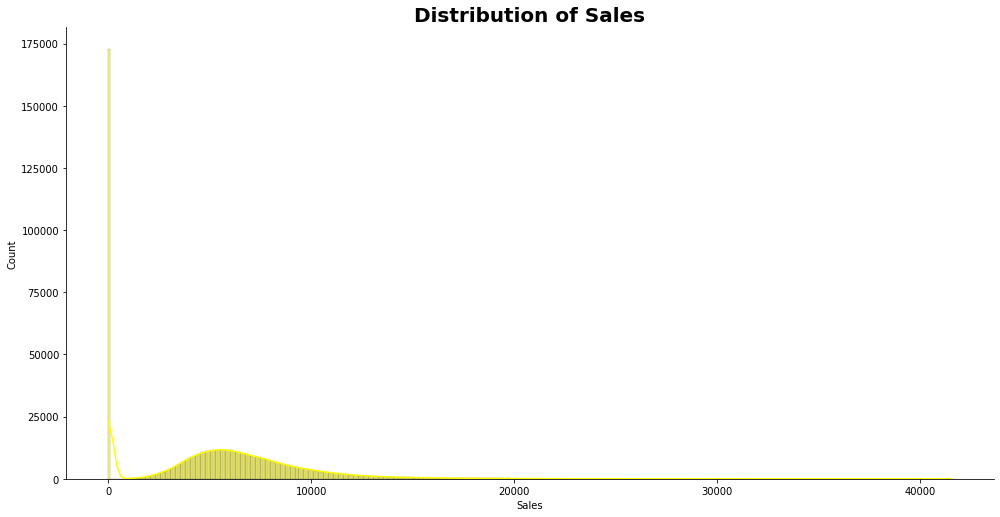

In [32]:
plot_hist(train,column='Sales',color='yellow')

In [33]:
#sales behavior before, during and after holidays
pre_holiday = train[(train["Date"]> '2013-12-09') & (train["Date"]< '2013-12-22')  ]

during_holiday= train[(train["Date"]> '2013-12-22') & (train["Date"]< '2013-12-31')  ]

post_holiday = train[(train["Date"]> '2013-12-31') & (train["Date"]< '2014-01-15')  ]

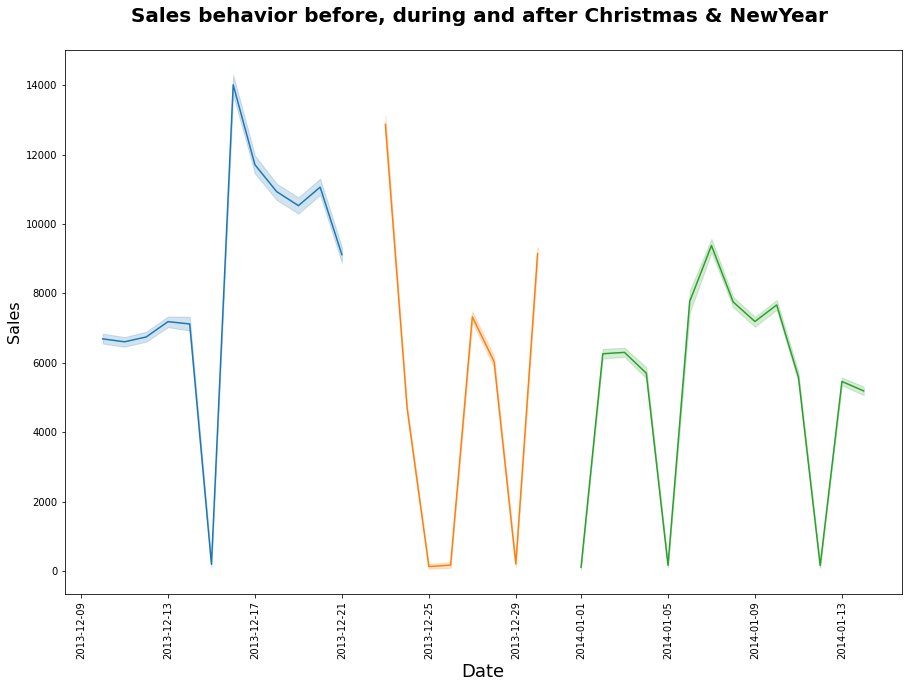

In [34]:
fig,ax=plt.subplots(figsize=(15,10))
sns.lineplot(x = pre_holiday["Date"] , y = pre_holiday["Sales"])
sns.lineplot(x = during_holiday["Date"] , y = during_holiday["Sales"])
sns.lineplot(x = post_holiday["Date"] , y = post_holiday["Sales"])
plt.xticks(rotation=90)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.title(f'Sales behavior before, during and after Christmas & NewYear \n', size=20, fontweight='bold')
plt.show()


People sell sell more before christmas , becaus we can notice that  there is a great pic  and the big one was notice  before christmas .

### Correlation between sales and number of customers

In [35]:
correlation=train.corr()
correlation

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Sales_per_Customer
Store,1.000000,-0.026394,-0.037472,-0.000224,0.008488,0.006942,0.029202,-0.000008,0.005126,0.024325,-0.000047,0.000058,0.000641,-0.048423
CompetitionDistance,-0.026394,1.000000,-0.048499,0.020885,-0.139700,-0.024716,-0.094032,-0.000025,-0.019207,-0.102777,0.007981,0.000138,-0.003684,0.205991
CompetitionOpenSinceMonth,-0.037472,-0.048499,1.000000,0.058298,0.021534,0.004678,0.014728,0.000003,-0.023226,-0.024093,0.001436,-0.000008,0.000124,0.006308
CompetitionOpenSinceYear,-0.000224,0.020885,0.058298,1.000000,-0.022581,-0.015342,-0.023456,-0.000022,0.008740,0.006541,0.002557,0.000130,0.001841,0.004988
Promo2,0.008488,-0.139700,0.021534,-0.022581,1.000000,-0.016360,0.304710,0.000168,-0.091040,-0.150159,-0.008309,-0.000983,-0.006909,0.215878
Promo2SinceWeek,0.006942,-0.024716,0.004678,-0.015342,-0.016360,1.000000,-0.237498,0.000120,0.039864,0.026552,-0.001595,-0.000697,-0.002090,0.049896
Promo2SinceYear,0.029202,-0.094032,0.014728,-0.023456,0.304710,-0.237498,1.000000,0.000084,-0.040708,-0.029347,-0.001421,-0.000490,-0.004572,-0.024585
DayOfWeek,-0.000008,-0.000025,0.000003,-0.000022,0.000168,0.000120,0.000084,1.000000,-0.462125,-0.386445,-0.528963,-0.392925,-0.205388,-0.094924
Sales,0.005126,-0.019207,-0.023226,0.008740,-0.091040,0.039864,-0.040708,-0.462125,1.000000,0.894711,0.678472,0.452345,0.085124,0.186581
Customers,0.024325,-0.102777,-0.024093,0.006541,-0.150159,0.026552,-0.029347,-0.386445,0.894711,1.000000,0.616768,0.316169,0.071568,-0.323898


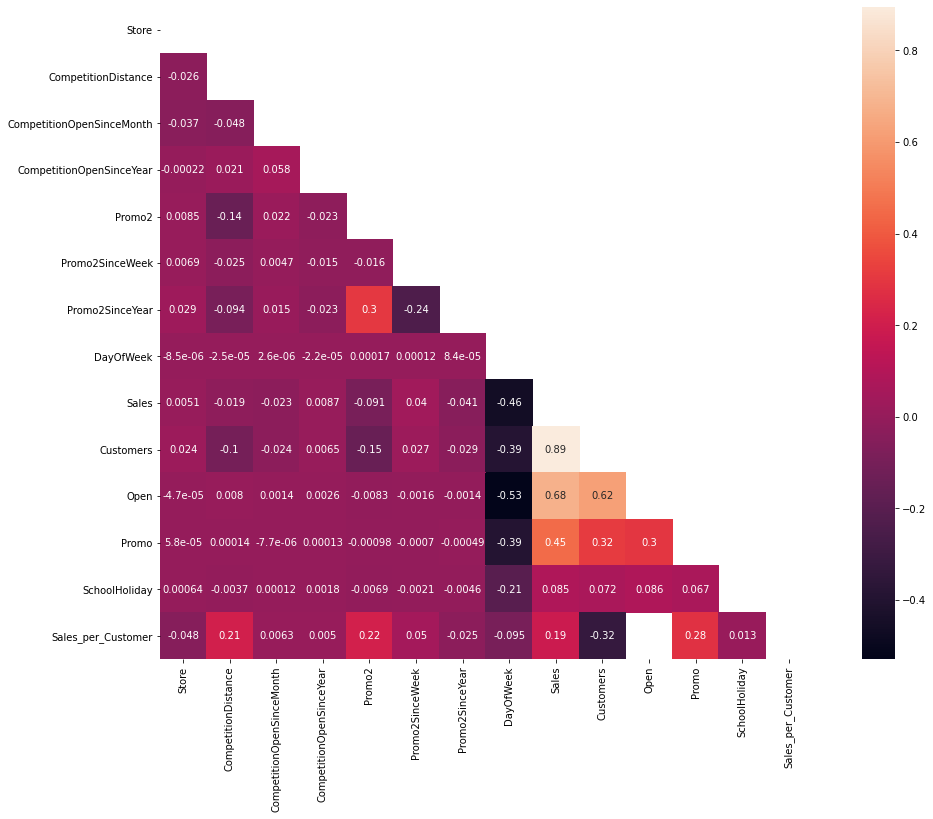

In [36]:
matrix=np.triu(train.corr())

sns.heatmap(correlation,annot=True,square=True,mask=matrix)
fig=plt.gcf()
figsize=fig.get_size_inches()
fig.set_size_inches(figsize*3)
plt.show()

The corelation between Sales and Customers is high(0.89) and we ca  notice that there is a  positive correlation  between Sales and Custermers .

### How does promo affect sales? 

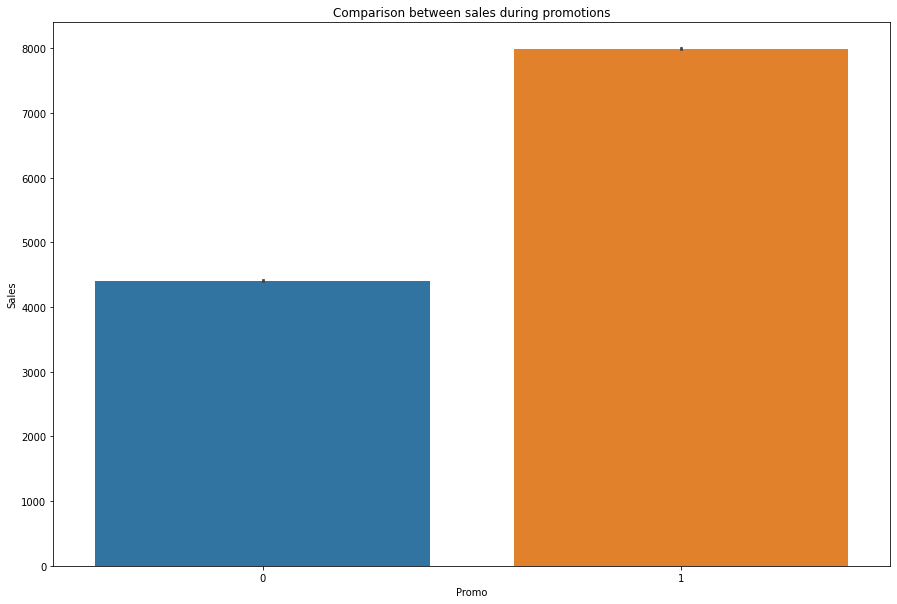

In [37]:
fig,ax=plt.subplots(figsize=(15,10))
sns.barplot(x='Promo',y='Sales',data=train) 
plt.title('Comparison between sales during promotions')
plt.show()


The result above with the table of coorelation allow us to see that  the correaltion with promo and Sale is not so strong(0.45), but with the plot we can obviously see that  when there is a promotion people sell more  than without promotion and custumers are more attrack  to buy goods when the price is low.

In [38]:
train.groupby('Store')[['Sales','Customers']].sum().sort_values('Sales', ascending=False).head()

,Sales,Customers
Store,,
262,19516842,3204694
817,17057867,2454370
562,16927322,2924960
1114,16202585,2509542
251,14896870,1908934


In [36]:

#let's get the  Store with maximum sale count
train[train["Sales"] == train["Sales"].max()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales_per_Customer
827591,909,a,c,1680.0,9.0,2013.0,1,45.0,2009.0,"Feb,May,Aug,Nov",1,2015-06-22,41551,1721,1,0,0,0,24.143521


It is the store 909 which sale more at the Year 2013.

### Which stores are opened on all weekdays? How does that affect their sales on weekends? 


In [37]:
def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

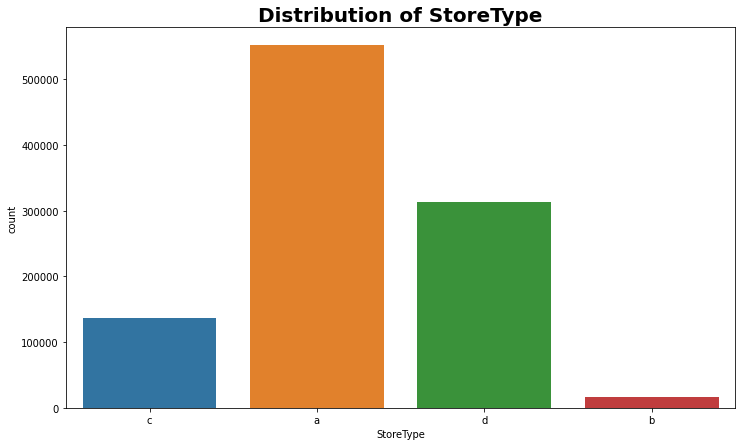

In [41]:
plot_count(train,column='StoreType')

With the plot above the best type  store model  is  type a 

In [42]:
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()


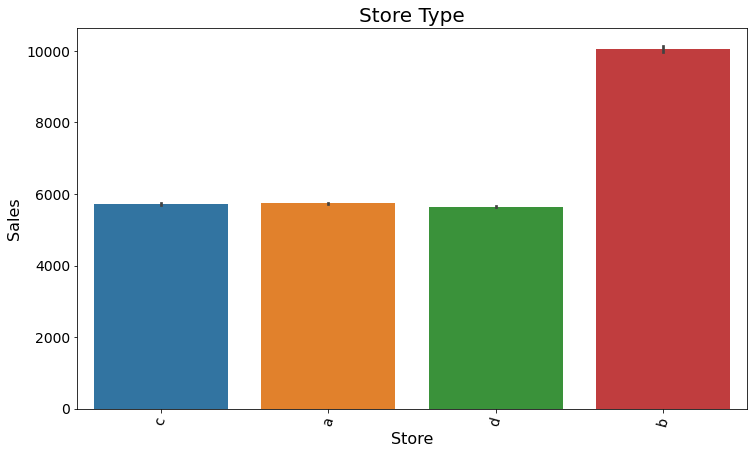

In [43]:
plot_bar(train,x_col='StoreType',y_col='Sales',title ='Store Type',xlabel='Store',ylabel='Sales') 


The type of Store which sell much is the  Store b . The type of store  a, c, d are look same , which means  there are propotional  at the same level.

In [38]:
promo1=train.loc[train['Promo']==1]
promo1.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales_per_Customer
0,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0,"Jan,Apr,Jul,Oct",5,2015-07-31,5263,555,1,1,0,1,9.482883
1,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0,"Jan,Apr,Jul,Oct",4,2015-07-30,5020,546,1,1,0,1,9.194139
2,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0,"Jan,Apr,Jul,Oct",3,2015-07-29,4782,523,1,1,0,1,9.143403
3,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0,"Jan,Apr,Jul,Oct",2,2015-07-28,5011,560,1,1,0,1,8.948214
4,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0,"Jan,Apr,Jul,Oct",1,2015-07-27,6102,612,1,1,0,1,9.970588


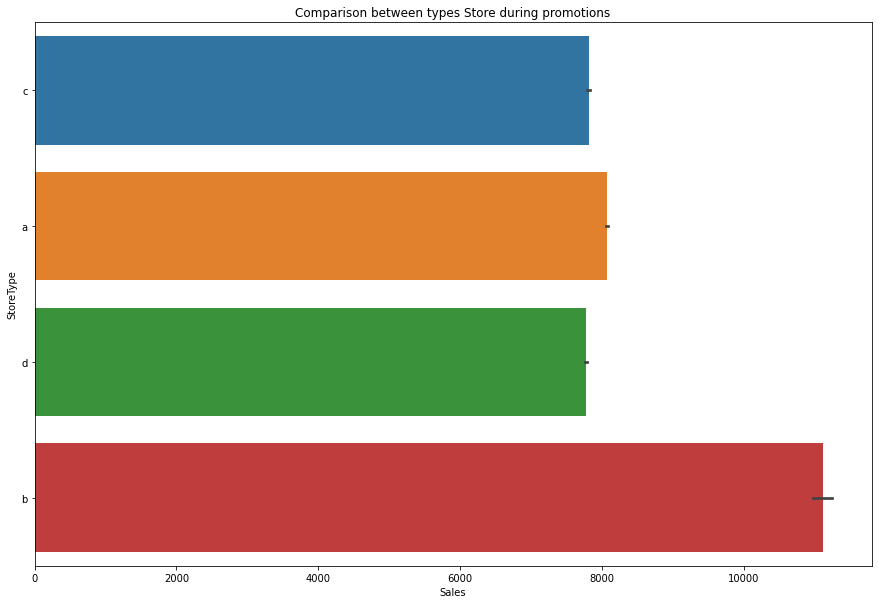

In [45]:
fig,ax=plt.subplots(figsize=(15,10))
sns.barplot(x='Sales',y='StoreType',data=promo1) 
plt.title('Comparison between types Store during promotions')
plt.show()

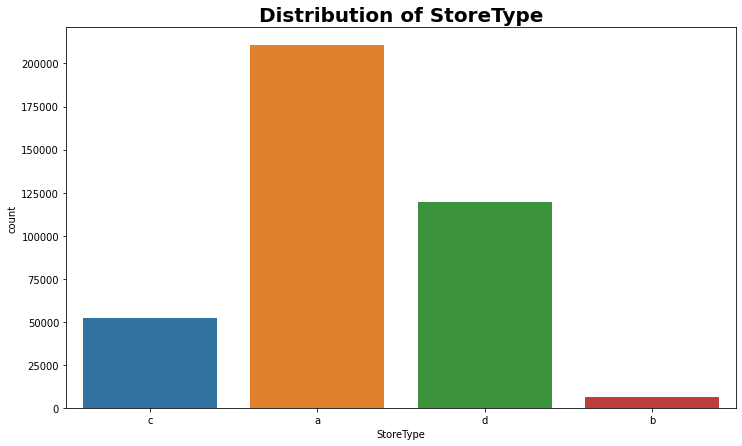

In [46]:

plot_count(promo1,column='StoreType')


Here, we can notice that,  It is the store a which is more suitable.

### Trends of customer behavior during store open and closing times

In [39]:
#splitting date column into day_name,month,weekdef features_create(data):
def features_create(data): 
    data['WeekOfYear'] = data.Date.dt.weekofyear
    data['year']=train['Date'].dt.year
    data['month']=train['Date'].dt.month
    data['day_name']=train['Date'].dt.day_name()
    return data
features_create(train)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales_per_Customer,WeekOfYear,year,month,day_name
0,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0,"Jan,Apr,Jul,Oct",5,2015-07-31,5263,555,1,1,0,1,9.482883,31,2015,7,Friday
1,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0,"Jan,Apr,Jul,Oct",4,2015-07-30,5020,546,1,1,0,1,9.194139,31,2015,7,Thursday
2,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0,"Jan,Apr,Jul,Oct",3,2015-07-29,4782,523,1,1,0,1,9.143403,31,2015,7,Wednesday
3,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0,"Jan,Apr,Jul,Oct",2,2015-07-28,5011,560,1,1,0,1,8.948214,31,2015,7,Tuesday
4,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0,"Jan,Apr,Jul,Oct",1,2015-07-27,6102,612,1,1,0,1,9.970588,31,2015,7,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,d,c,5350.0,9.0,2013.0,1,22.000000,2012.0,"Mar,Jun,Sept,Dec",6,2013-01-05,4771,339,1,0,0,1,14.073746,1,2013,1,Saturday
1017205,1115,d,c,5350.0,9.0,2013.0,1,22.000000,2012.0,"Mar,Jun,Sept,Dec",5,2013-01-04,4540,326,1,0,0,1,13.926380,1,2013,1,Friday
1017206,1115,d,c,5350.0,9.0,2013.0,1,22.000000,2012.0,"Mar,Jun,Sept,Dec",4,2013-01-03,4297,300,1,0,0,1,14.323333,1,2013,1,Thursday
1017207,1115,d,c,5350.0,9.0,2013.0,1,22.000000,2012.0,"Mar,Jun,Sept,Dec",3,2013-01-02,3697,305,1,0,0,1,12.121311,1,2013,1,Wednesday


In [41]:
def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

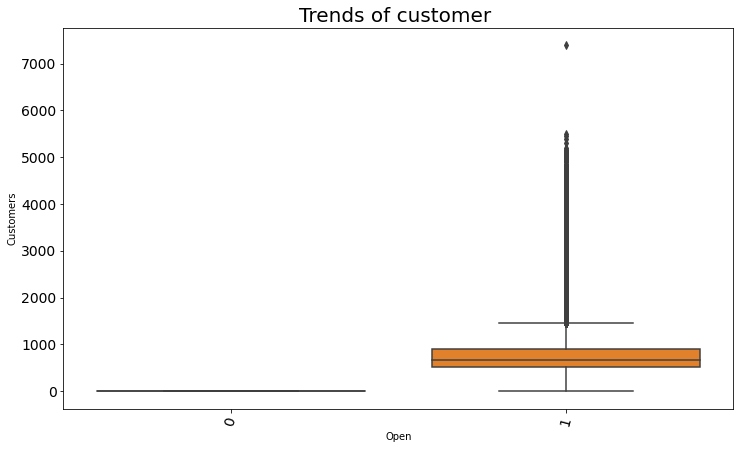

In [49]:
plot_box_multi(train,x_col="Open",y_col="Customers",title='Trends of customer ')

#### Open

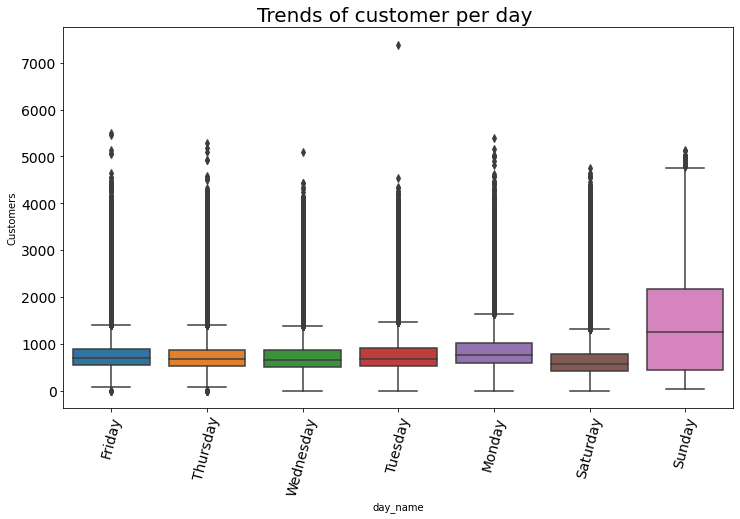

In [42]:
#Let's split the dataframe into 2 part : open and close

open1=train.loc[train['Open']==1]
plot_box_multi(open1,x_col="day_name",y_col="Customers",title='Trends of customer per day ')



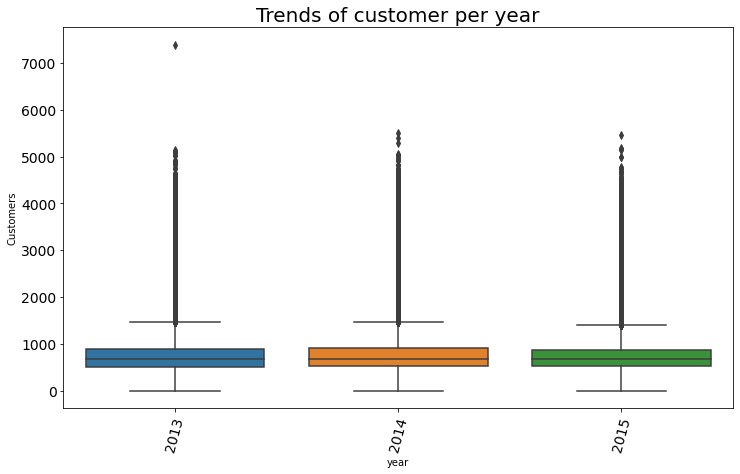

In [51]:
plot_box_multi(open1,x_col="year",y_col="Customers",title='Trends of customer per year')

#### Close

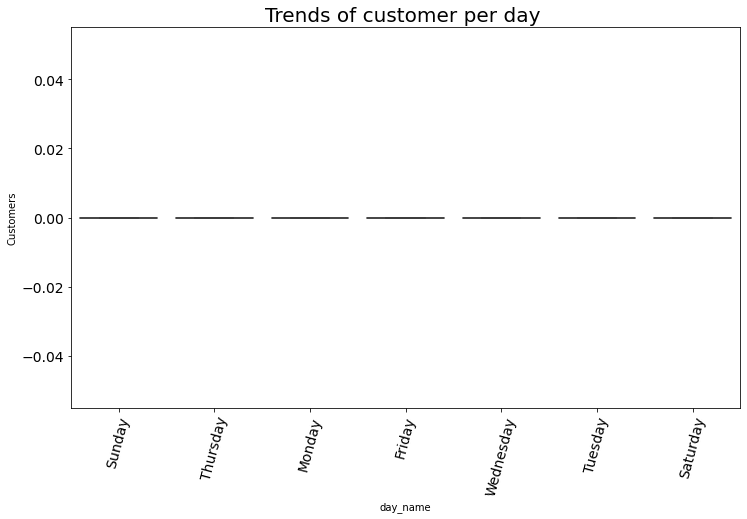

In [55]:
##Close
close1=train.loc[train['Open']==0]
plot_box_multi(close1,x_col="day_name",y_col="Customers",title='Trends of customer per day ')


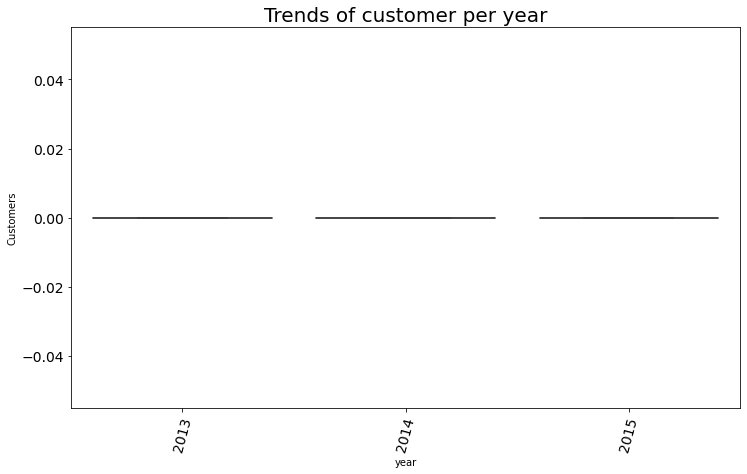

In [56]:
plot_box_multi(close1,x_col="year",y_col="Customers",title='Trends of customer per year')

### Which stores are opened on all weekdays? How does that affect their sales on weekends? 

In [43]:
open1.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales_per_Customer,WeekOfYear,year,month,day_name
0,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0,"Jan,Apr,Jul,Oct",5,2015-07-31,5263,555,1,1,0,1,9.482883,31,2015,7,Friday
1,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0,"Jan,Apr,Jul,Oct",4,2015-07-30,5020,546,1,1,0,1,9.194139,31,2015,7,Thursday
2,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0,"Jan,Apr,Jul,Oct",3,2015-07-29,4782,523,1,1,0,1,9.143403,31,2015,7,Wednesday
3,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0,"Jan,Apr,Jul,Oct",2,2015-07-28,5011,560,1,1,0,1,8.948214,31,2015,7,Tuesday
4,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0,"Jan,Apr,Jul,Oct",1,2015-07-27,6102,612,1,1,0,1,9.970588,31,2015,7,Monday


In [46]:
#train.loc[train['Open']==0]
weekend1= open1.loc[open1['day_name'] == 'Saturday']
weekend1['week1']=weekend1['day_name'] 
weekend1

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales_per_Customer,WeekOfYear,year,month,day_name,week1
6,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0,"Jan,Apr,Jul,Oct",6,2015-07-25,4364,500,1,0,0,0,8.728000,30,2015,7,Saturday,Saturday
13,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0,"Jan,Apr,Jul,Oct",6,2015-07-18,4406,512,1,0,0,0,8.605469,29,2015,7,Saturday,Saturday
20,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0,"Jan,Apr,Jul,Oct",6,2015-07-11,3530,441,1,0,0,0,8.004535,28,2015,7,Saturday,Saturday
27,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0,"Jan,Apr,Jul,Oct",6,2015-07-04,4797,560,1,0,0,0,8.566071,27,2015,7,Saturday,Saturday
34,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.0,"Jan,Apr,Jul,Oct",6,2015-06-27,4019,463,1,0,0,0,8.680346,26,2015,6,Saturday,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017176,1115,d,c,5350.0,9.0,2013.0,1,22.000000,2012.0,"Mar,Jun,Sept,Dec",6,2013-02-02,5411,389,1,0,0,0,13.910026,5,2013,2,Saturday,Saturday
1017183,1115,d,c,5350.0,9.0,2013.0,1,22.000000,2012.0,"Mar,Jun,Sept,Dec",6,2013-01-26,4896,394,1,0,0,0,12.426396,4,2013,1,Saturday,Saturday
1017190,1115,d,c,5350.0,9.0,2013.0,1,22.000000,2012.0,"Mar,Jun,Sept,Dec",6,2013-01-19,5207,369,1,0,0,0,14.111111,3,2013,1,Saturday,Saturday
1017197,1115,d,c,5350.0,9.0,2013.0,1,22.000000,2012.0,"Mar,Jun,Sept,Dec",6,2013-01-12,4497,350,1,0,0,0,12.848571,2,2013,1,Saturday,Saturday


In [63]:
weekend11 = weekend1.groupby('Store')[["Store","Sales","Customers","Open","week1"]]
weekend11.head()

,Store,Sales,Customers,Open,week1
6,1,4364,500,1,Saturday
13,1,4406,512,1,Saturday
20,1,3530,441,1,Saturday
27,1,4797,560,1,Saturday
34,1,4019,463,1,Saturday
...,...,...,...,...,...
1016273,1115,6897,478,1,Saturday
1016280,1115,7264,504,1,Saturday
1016287,1115,7164,483,1,Saturday
1016294,1115,6543,466,1,Saturday


In [64]:
weekend2= open1.loc[open1['day_name'] == 'Sunday']
weekend2['week2']=weekend2['day_name'] 
weekend2

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales_per_Customer,WeekOfYear,year,month,day_name,week2
76741,85,b,a,1870.0,10.0,2011.0,0,23.595447,2011.0,"Jan,Apr,Jul,Oct",7,2015-07-26,11421,1606,1,0,0,0,7.111457,30,2015,7,Sunday,Sunday
76748,85,b,a,1870.0,10.0,2011.0,0,23.595447,2011.0,"Jan,Apr,Jul,Oct",7,2015-07-19,13275,1633,1,0,0,0,8.129210,29,2015,7,Sunday,Sunday
76755,85,b,a,1870.0,10.0,2011.0,0,23.595447,2011.0,"Jan,Apr,Jul,Oct",7,2015-07-12,13183,1615,1,0,0,0,8.162848,28,2015,7,Sunday,Sunday
76762,85,b,a,1870.0,10.0,2011.0,0,23.595447,2011.0,"Jan,Apr,Jul,Oct",7,2015-07-05,12070,1734,1,0,0,0,6.960784,27,2015,7,Sunday,Sunday
76769,85,b,a,1870.0,10.0,2011.0,0,23.595447,2011.0,"Jan,Apr,Jul,Oct",7,2015-06-28,11055,1520,1,0,0,0,7.273026,26,2015,6,Sunday,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002783,1099,a,c,200.0,4.0,2013.0,1,14.000000,2013.0,"Jan,Apr,Jul,Oct",7,2013-03-31,4072,666,1,0,0,0,6.114114,13,2013,3,Sunday,Sunday
1002790,1099,a,c,200.0,4.0,2013.0,1,14.000000,2013.0,"Jan,Apr,Jul,Oct",7,2013-03-24,5989,858,1,0,0,0,6.980186,12,2013,3,Sunday,Sunday
1002797,1099,a,c,200.0,4.0,2013.0,1,14.000000,2013.0,"Jan,Apr,Jul,Oct",7,2013-03-17,4415,668,1,0,0,0,6.609281,11,2013,3,Sunday,Sunday
1002804,1099,a,c,200.0,4.0,2013.0,1,14.000000,2013.0,"Jan,Apr,Jul,Oct",7,2013-03-10,2139,283,1,0,0,0,7.558304,10,2013,3,Sunday,Sunday


In [65]:
weekend22 = weekend2.groupby('Store')[["Store","Sales","Customers","Open","week2"]]
weekend22.head()

,Store,Sales,Customers,Open,week2
76741,85,11421,1606,1,Sunday
76748,85,13275,1633,1,Sunday
76755,85,13183,1615,1,Sunday
76762,85,12070,1734,1,Sunday
76769,85,11055,1520,1,Sunday
...,...,...,...,...,...
1001936,1099,5683,962,1,Sunday
1001943,1099,5538,844,1,Sunday
1001950,1099,5053,732,1,Sunday
1001957,1099,4320,642,1,Sunday


In [105]:
#df.dropna(subset = ["column2"], inplace=True)
store_wk.dropna(subset=["Store"],inplace=True)
#store_wk.dropna(subset=["week1"],inplace=True)
store_wk.shape

(0, 4)

In [103]:
store_wk = open_wkd[['Store','week1','week2']]
store_wk


,Store,Store,week1,week2
6,1.0,NaN,Saturday,NaN
13,1.0,NaN,Saturday,NaN
20,1.0,NaN,Saturday,NaN
27,1.0,NaN,Saturday,NaN
34,1.0,NaN,Saturday,NaN
...,...,...,...,...
1017176,1115.0,NaN,Saturday,NaN
1017183,1115.0,NaN,Saturday,NaN
1017190,1115.0,NaN,Saturday,NaN
1017197,1115.0,NaN,Saturday,NaN


In [83]:
store_wk.isnull().sum()

Store    0
week1    0
week2    0
dtype: int64

In [84]:
open1.shape

(844392, 23)